# **INTRODUCTION**

- This dataset captures a comprehensive view of loan applications, containing information about applicants’ demographics, financial histories, and loan-specific details. It includes features such as age, gender, education level, income, credit score, employment experience, home ownership, loan amount, and purpose. Additionally, it records whether an applicant has defaulted on previous loans and the final status of their application—approved or rejected. This data is crucial for financial institutions to assess applicants' creditworthiness and make informed lending decisions. By analyzing this dataset, we can uncover patterns and trends that influence loan approvals, enabling the development of a predictive model to automate and optimize the loan evaluation process. Such a model not only reduces financial risk for lenders but also promotes fairness and efficiency in decision-making, providing a valuable tool for modern financial services.

# **PROBLEM STATEMENT**
- Financial institutions face challenges in evaluating loan applications due to the diverse range of applicants' financial profiles and the risk involved in lending. An inaccurate assessment of creditworthiness can result in financial losses for lenders or unfair rejection of creditworthy applicants.

- This dataset provides information about loan applicants, including their demographics, financial history, loan details, and outcomes (approval or rejection). The objective is to leverage this data to build a predictive model that can classify whether a loan application will be approved or rejected.

# **OBJECTIVE**

- The objective of this dataset is to develop a predictive model that can accurately classify loan applications as approved or rejected based on various applicant demographics, financial histories, and loan-related attributes. By leveraging the insights from features such as credit score, income, employment experience, loan amount, and previous defaults, the goal is to help financial institutions mitigate risks by identifying high-risk applicants likely to default. Additionally, the model aims to ensure fair and unbiased decision-making by relying on data-driven insights, promoting transparency and consistency in the loan approval process. This predictive tool would also optimize operational efficiency by automating the evaluation process, reducing the time and resources required for manual assessments. Moreover, analyzing the impact of different features will provide valuable insights to both lenders and applicants, guiding better lending policies and financial behaviors.

# **DATA OVERVIEW**

- The dataset consists of 45,000 records, each representing a loan application, with 14 features capturing applicant demographics, financial details, and loan-specific attributes. Key variables include the applicant's age, gender, income, education, credit score, employment experience, and previous loan defaults, as well as loan details like amount, interest rate, and purpose. The target variable, loan_status, indicates whether a loan was approved (1) or rejected (0). This dataset provides a diverse range of information essential for evaluating creditworthiness and identifying factors influencing loan approval outcomes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/loan_data.csv')
df=pd.DataFrame(data)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.shape

(45000, 14)

# **VISUALIZATION**

- Key Use Cases:
  - Histograms (sns.histplot and df.hist) are ideal for numerical or ordinal data to observe the spread, skewness, and frequency.
  - Count plots (sns.countplot) are tailored for categorical data, enabling an easy overview of category distribution.

- The line creates a histogram using Seaborn's histplot function. It visualizes the distribution of the loan_status variable in the DataFrame df. This is particularly useful for understanding how often each status appears and spotting patterns or anomalies in the data.

- The line creates a count plot using Seaborn's countplot function. Unlike a histogram, the count plot explicitly counts and displays the number of occurrences of each category in the loan_status column as bars. It's effective for categorical data and gives a clear comparison between categories.  

- The line generates histograms for all numeric columns in the DataFrame df using Pandas' hist function. The figsize=(15,15) argument specifies the size of the resulting figure to ensure all plots are displayed clearly. It's a quick way to explore the distributions of multiple numerical variables in the dataset.

<Axes: xlabel='loan_status', ylabel='Count'>

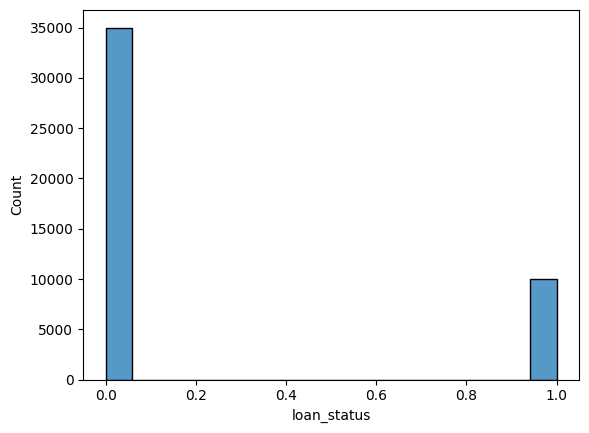

In [ ]:
sns.histplot(df['loan_status'])

<Axes: xlabel='loan_status', ylabel='count'>

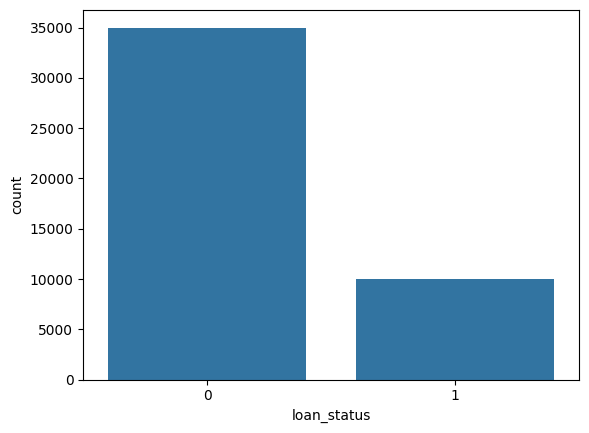

In [ ]:
sns.countplot(x='loan_status',data=df)

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

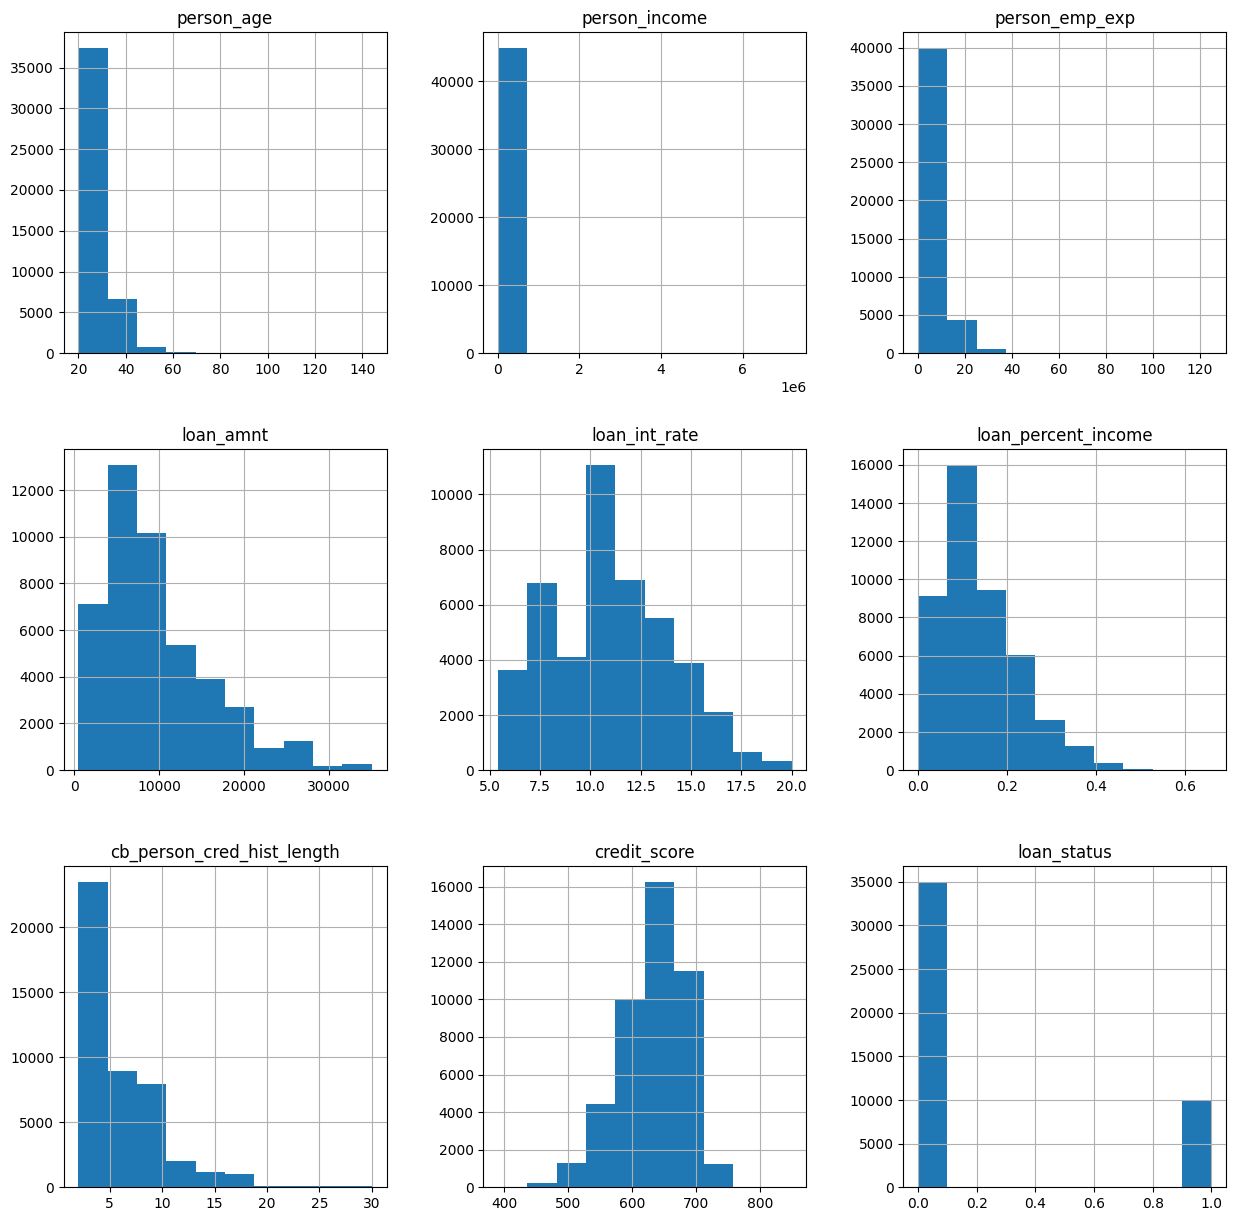

In [ ]:
df.hist(figsize=(15,15))

# **DATA ENCODING**

- This imports the LabelEncoder class from Scikit-learn. The LabelEncoder is used to convert categorical labels into numeric values. It assigns a unique integer to each unique category in a column.

- An instance of the LabelEncoder is created and stored in the variable le. This instance will be used to encode categorical data.

- The fit_transform method of LabelEncoder is applied to the person_gender column of the DataFrame df.
This transforms the person_gender column from categorical values (e.g., "Male", "Female") into numerical values (e.g., 0 for "Female" and 1 for "Male"). The specific encoding depends on the categories in the column.
The transformed column replaces the original categorical data.

- Similar to the above step, this encodes the previous_loan_defaults_on_file column. For instance, "Yes" and "No" might be transformed into 1 and 0, respectively.
The column is updated with the encoded numerical values.
df

- The DataFrame df is displayed to show the changes. The categorical columns person_gender and previous_loan_defaults_on_file now contain numerical representations instead of text.

- Purpose:
 -  Simplifies Machine Learning: Machine learning algorithms typically require numerical input. Encoding categorical data ensures compatibility.
 - Improves Efficiency: Encoding reduces memory usage and computational complexity when working with categorical data.
 - Prepares Data for Modeling: By transforming non-numeric data into numeric form, the dataset becomes ready for predictive modeling and analysis.

In [1]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['person_gender']=le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file']=le.fit_transform(df['previous_loan_defaults_on_file'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,0,1
44996,37.0,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,0,1
44997,33.0,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,0,1
44998,29.0,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,0,1


# **MAPPING**

- These lines display the unique values present in the respective columns of the DataFrame df.
- This step helps identify all the categories in each column so they can be appropriately mapped to numerical values in the next steps.

- An ordinal mapping dictionary is defined, where each education level is assigned a numeric rank (1 for "High School," 2 for "Bachelor," etc.). The rankings reflect a logical order of educational attainment.
The map() function is applied to the person_education column, replacing its categorical values with their corresponding numeric values from the ordinal_mapping dictionary.

- A similar ordinal mapping dictionary is defined for the person_home_ownership column, where different types of home ownership are assigned numeric values.

- Another mapping is defined for the loan_intent column, assigning numeric values to different loan purposes.

- Another mapping is defined for the loan_intent column, assigning numeric values to different loan purposes.

- Purpose:
  - Transforms Categorical Data into Numerical Values:

   - Converts non-numeric data into a format suitable for machine learning algorithms, which typically require numeric input.
  - Imposes Logical Order (Ordinal Encoding):

   - By mapping categories to numeric values in a specific order, the data reflects the inherent ranking or priority among categories (e.g., education levels).
  - Simplifies Data Processing:

   - Numeric data is easier to process, analyze, and use in predictive models compared to raw categorical strings.
  - Enhances Interpretability:

   - The mappings ensure that the transformed data remains interpretable, as each numeric value corresponds to a clear, pre-defined category.







In [ ]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
ordinal_mapping={'High School': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4, 'Associate': 5}
df['person_education']=df['person_education'].map(ordinal_mapping)

ordinal_mapping={'OWN': 1, 'MORTGAGE': 2, 'RENT': 3, 'OTHER': 4}
df['person_home_ownership']=df['person_home_ownership'].map(ordinal_mapping)

ordinal_mapping={'EDUCATION': 1, 'MEDICAL': 2, 'PERSONAL': 3, 'HOMEIMPROVEMENT': 4, 'VENTURE': 5, 'DEBTCONSOLIDATION': 6}
df['loan_intent']=df['loan_intent'].map(ordinal_mapping)

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,3,35000.0,3,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,3,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,3,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,5,47971.0,6,3,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,5,65800.0,17,3,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,1,5,56942.0,7,3,2771.0,6,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


# **OVER SAMPLING**

- Import Required Libraries:
  - The imblearn.over_sampling library provides tools for handling imbalanced datasets by oversampling.
  - RandomOverSampler and SMOTE (Synthetic Minority Over-sampling Technique) are two oversampling methods for balancing classes in a dataset.

- Purpose and Utility
  - Handle Class Imbalance:

    - Balances the dataset by oversampling the minority class to ensure equal representation. This is particularly important for machine learning models, as imbalanced data can lead to biased predictions.
  - Enhance Model Performance:

   - By creating a balanced dataset, models are trained on more diverse and representative data, reducing the likelihood of bias toward the majority class.
 - Visual Validation:

   - The sns.countplot provides a quick visual confirmation that the target variable (loan_status) is now balanced after oversampling.
 - Flexibility in Methods:

   - The user can choose between Random Oversampling (simpler but can lead to overfitting) or SMOTE (more sophisticated and realistic).

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

#Assuming df is your DataFrame with 'loan Status' as the target variable
x=df.drop('loan_status', axis=1)
y=df['loan_status']

#Create an oversampler object (choose either RandomOverSampler or SMOTE)
#Uncomnt the one you wish to use:
ros=RandomOverSampler()  # For Random Over Sampling
ros=SMOTE()    # For Synthetic Minority OverSampling

#Apply OverSampler to the data
x_resampled,y_resampled=ros.fit_resample(x,y)


#Create a new DataFrame with resampled data
#Ensure x_resampled is a DataFrame and y_resampled is Series to allow concatention

# X_RESAMPLED=pd.DataFrame(x_resampled,columns=x.columns)
# Y_RESAMPLED=pd.Series(y_resampled,name='loan_status'])

df=pd.concat([x_resampled,y_resampled],axis=1)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,3,71948.000000,0,3,35000.000000,3,16.020000,0.490000,3.000000,561,0,1
1,21.000000,0,1,12282.000000,0,1,1000.000000,1,11.140000,0.080000,2.000000,504,1,0
2,25.000000,0,1,12438.000000,3,2,5500.000000,2,12.870000,0.440000,3.000000,635,0,1
3,23.000000,0,2,79753.000000,0,3,35000.000000,2,15.230000,0.440000,2.000000,675,0,1
4,24.000000,1,3,66135.000000,1,3,35000.000000,2,14.270000,0.530000,4.000000,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,24.310050,1,2,68058.454711,0,3,24884.041453,2,16.254362,0.366900,4.000000,631,0,1
69996,23.384242,1,1,36815.679986,2,3,10000.000000,2,14.724376,0.270000,3.231516,602,0,1
69997,30.060497,0,2,47908.364058,11,3,1500.000000,6,7.531952,0.030000,9.043212,685,0,1
69998,24.633181,1,1,39314.003922,1,3,14189.160675,2,8.564938,0.362333,3.166558,640,0,1


<Axes: xlabel='loan_status', ylabel='count'>

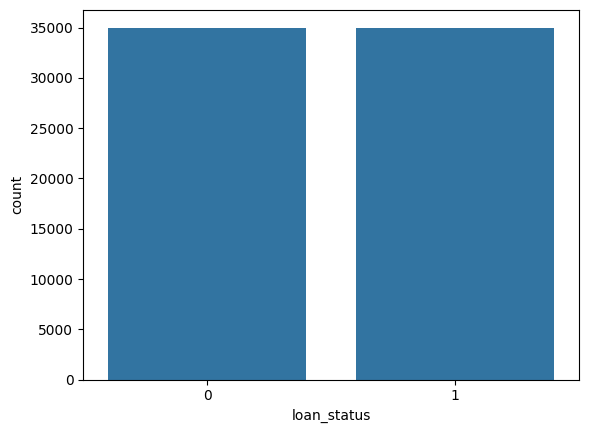

In [ ]:
sns.countplot(x='loan_status', data=df)

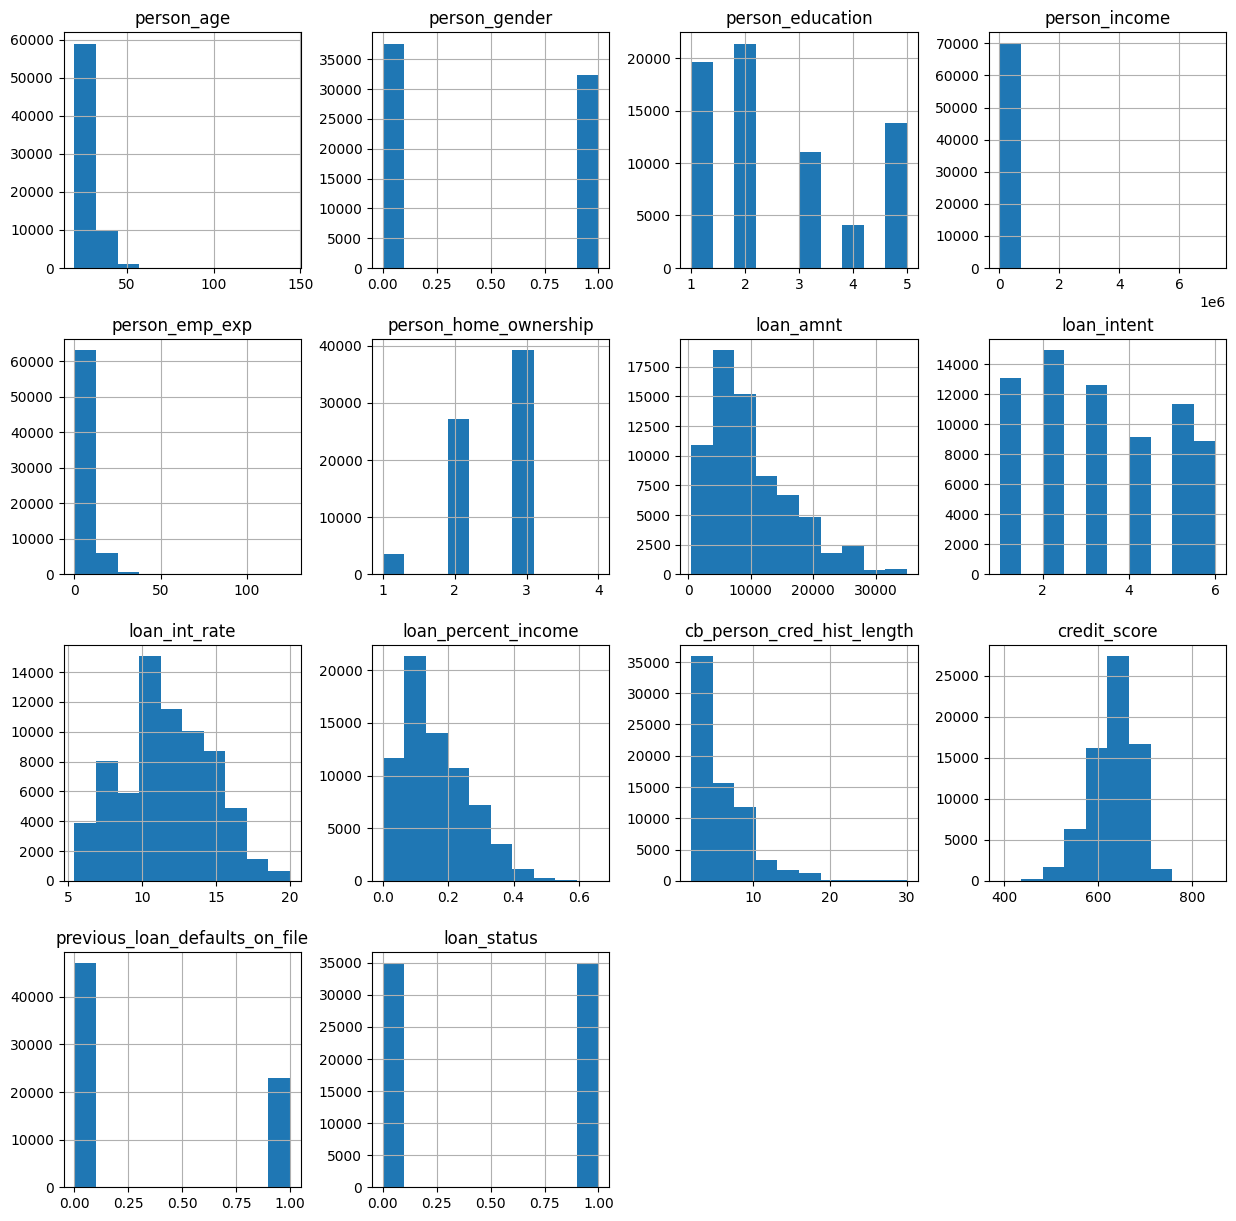

In [ ]:
df.hist(figsize=(15,15))
plt.show()

# **CORRELATION ANALYSIS**

- Purpose and Utility
  - Correlation Analysis:

   - Identifies the strength and direction of relationships between features and the target variable.
   - Guides feature selection by focusing on variables with higher predictive potential.
 - Heatmap Visualization:

   - Provides a clear, visual representation of relationships between features.
   - Highlights multicollinearity (high correlation between independent variables) that may need addressing.
 - Feature Reduction:

   - By dropping features with weak or redundant correlations, the dataset becomes simpler and less prone to overfitting.
   - Reducing dimensionality improves model interpretability and computational efficiency.
 - Improves Model Performance:

   - Keeping only relevant features ensures the model focuses on the most important information, potentially improving accuracy and reducing noise.

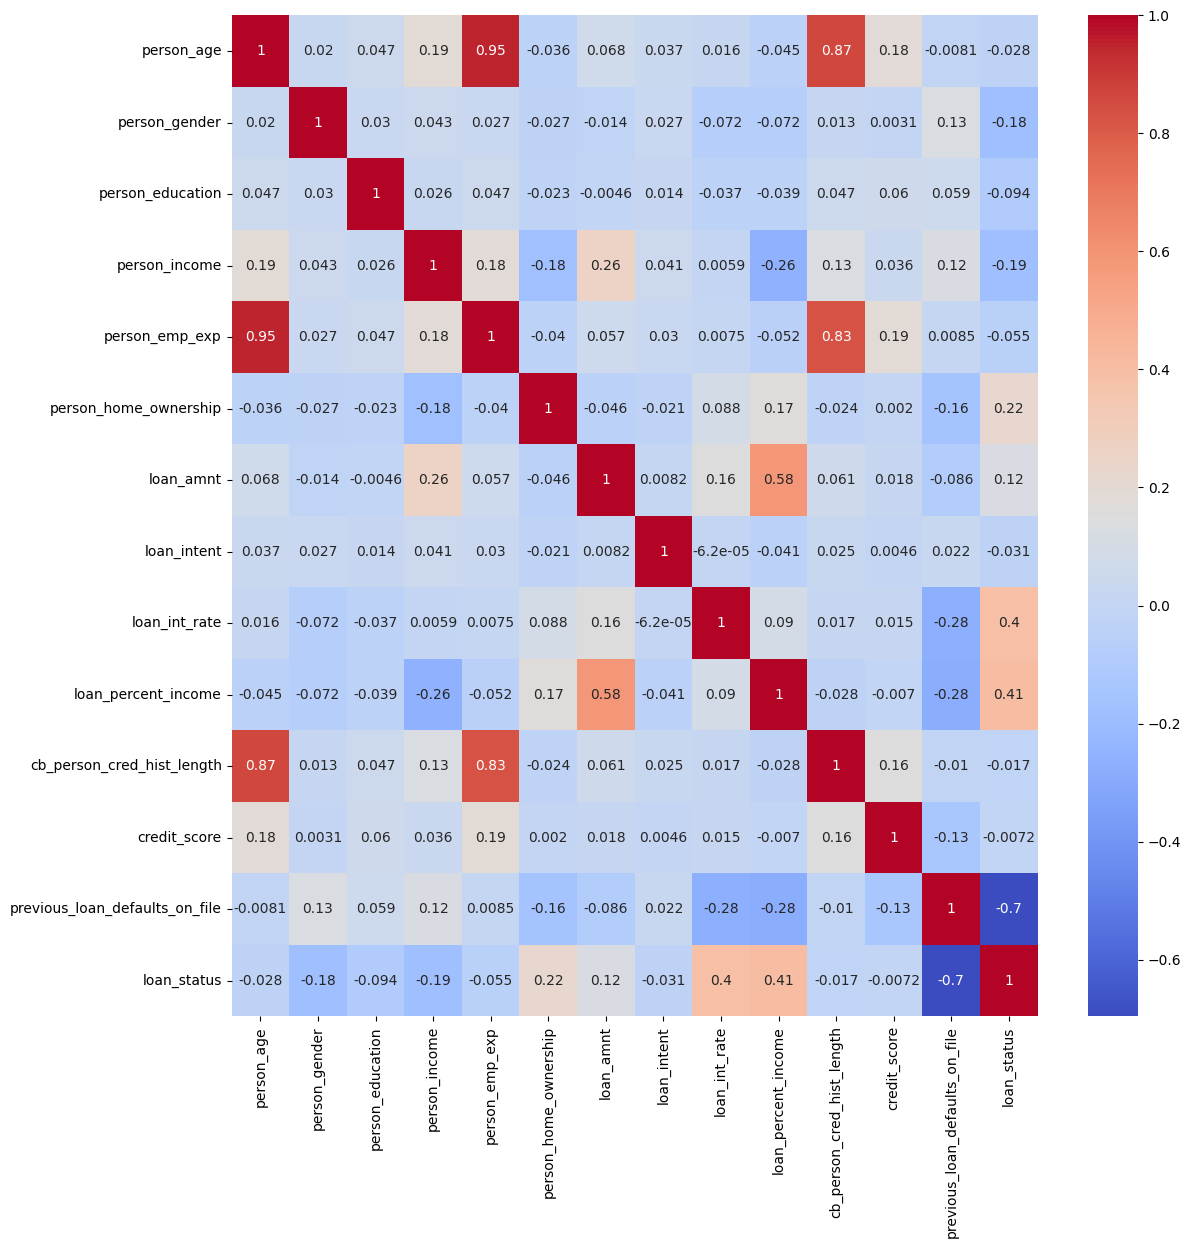

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
cor=df.corr()['loan_status'].sort_values(ascending=False)
cor

,loan_status
loan_status,1.000000
loan_percent_income,0.407729
loan_int_rate,0.396364
person_home_ownership,0.224538
loan_amnt,0.123666
credit_score,-0.007153
cb_person_cred_hist_length,-0.016934
person_age,-0.027710
loan_intent,-0.031295
person_emp_exp,-0.054592


In [ ]:
df.drop(['loan_amnt'],axis=1,inplace=True)
df.drop(['credit_score'],axis=1,inplace=True)
df.drop(['cb_person_cred_hist_length'],axis=1,inplace=True)
df.drop(['person_age'],axis=1,inplace=True)
df.drop(['loan_intent'],axis=1,inplace=True)
df.drop(['person_emp_exp'],axis=1,inplace=True)
df.drop(['person_education'],axis=1,inplace=True)
df.drop(['person_gender'],axis=1,inplace=True)
df.drop(['person_income'],axis=1,inplace=True)


# **OUTLIER DETECTION**

- Addressing Skewness:

Log transformation reduces skewness in data, particularly in features with exponential or long-tailed distributions.
- Outlier Detection:

Boxplots help identify extreme values that could affect modeling.
- Improving Data Suitability for Modeling:

Reducing skewness and handling outliers ensures features better fit the assumptions of many machine learning models.


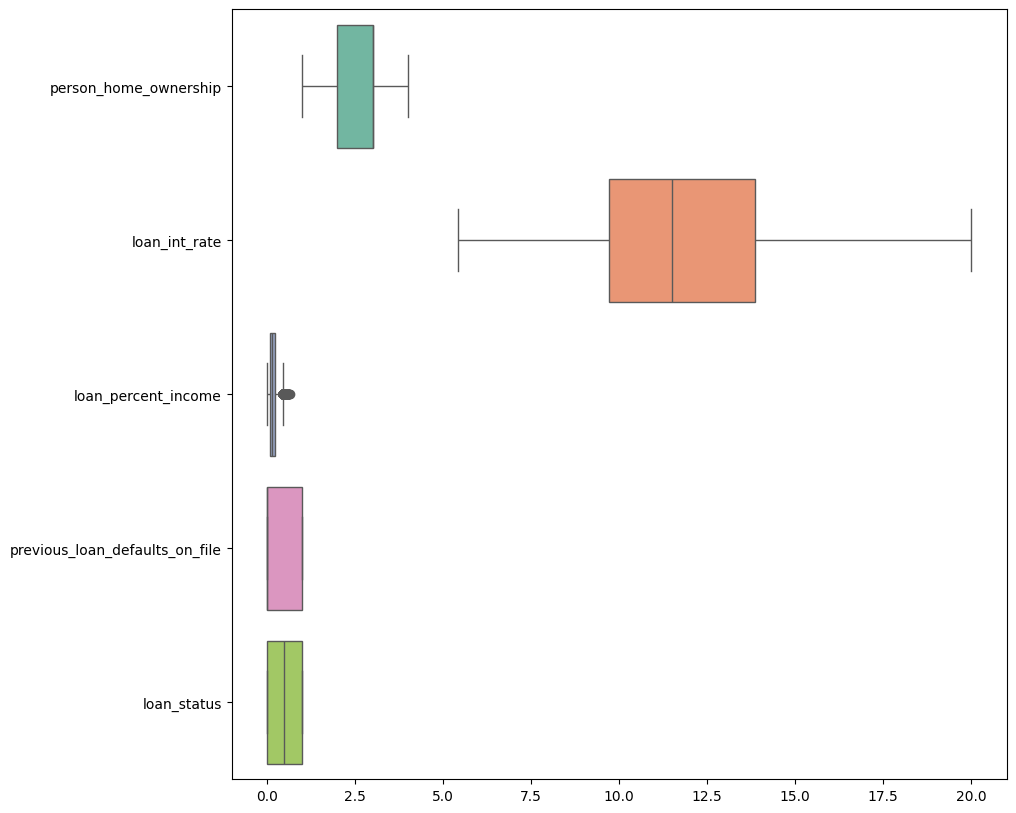

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df, orient='h', palette='Set2')
plt.show()

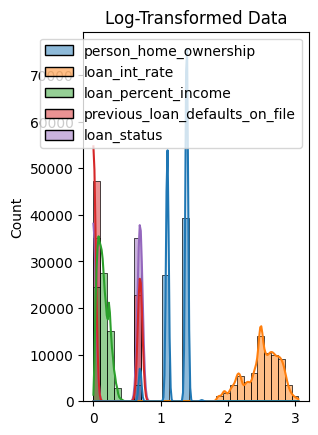

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# # Assuming log_data is a DataFrame with multiple features
# num_features = log_data.shape[1]  # Number of features
# plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

# for i, column in enumerate(log_data.columns, 1):
#     plt.subplot(1, num_features, i)  # Adjust layout for each feature
#     sns.histplot(log_data[column], bins=30, kde=True)
#     plt.title(f"Log-Transformed {column}")

# plt.tight_layout()
plt.show()

# **MODEL TRAINING and EVALUATION**

1.  Data Splitting and Scaling:
  - The feature set (X) and target variable (y) are separated.
  - Features are standardized using StandardScaler to scale the data to a standard normal distribution (mean = 0, standard deviation = 1). This ensures that all features contribute equally during model training.
  - The scaled data is split into training and testing sets using an 80/20 split.
2. Model Selection and Training:
 - Various machine learning models are considered for training:
    - Logistic Regression: A simple and interpretable model for binary classification.
    - Ridge Classifier: A linear model with L2 regularization to handle multicollinearity.
    - Gradient Boosting Classifier: An ensemble method that builds weak learners sequentially to minimize errors.
    - K-Nearest Neighbors (KNN): A non-parametric model that uses proximity to classify data.
     - Random Forest Classifier: An ensemble of decision trees offering high accuracy and robustness to overfitting.
    - Decision Tree Classifier: A simple, tree-based model for decision-making.
 - The selected model, Random Forest Classifier, is trained on the scaled training data.
3. Model Evaluation:
 - The trained model is tested on the unseen testing data.
 - Predictions (y_pred) are compared against true labels (y_test) to calculate the accuracy score.
4. Confusion Matrix:
  - A confusion matrix is generated to evaluate the model’s performance in terms of:
    - True Positives (TP): Correctly predicted positive cases.
    - True Negatives (TN): Correctly predicted negative cases.
    - False Positives (FP): Incorrectly predicted positive cases.
    - False Negatives (FN): Incorrectly predicted negative cases.
 - The confusion matrix is visualized using a heatmap for easier interpretation.
5. Visualization:
 - A heatmap displays the confusion matrix values, color-coded to show the intensity of predictions.
6. User Input Prediction:
 - The trained model is used for real-time prediction. The user is prompted to input values for specific features:
    - person_home_ownership
    - loan_int_rate (loan interest rate)
    - loan_percent_income (percentage of income taken as loan)
    - previous_loan_defaults_on_file (indicator for previous loan defaults)
 - The user-provided inputs are scaled and passed to the model, which predicts the loan status.

- Purpose and Utility:
  - Training and Testing Models:
    - Multiple models are explored to identify the best-performing classifier for predicting loan status.
  - Performance Metrics:
    - Accuracy score and confusion matrix provide insights into model performance.
    - The confusion matrix helps pinpoint specific areas (e.g., false positives) for improvement.
  - Real-Time Prediction:
    - The final model is deployed for real-world use, allowing users to input features and receive predictions.
  - Visualization:
   - Plots and heatmaps enhance the interpretability of results and provide a clear overview of performance metrics.


In [ ]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
x_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB



In [ ]:
# model= LogisticRegression()

# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print(accuracy_score(y_test, y_pred))

0.8637142857142858


In [ ]:
# model_1= RidgeClassifier()

# model_1.fit(x_train, y_train)
# y_pred = model_1.predict(x_test)
# print(accuracy_score(y_test, y_pred))

0.8549285714285715


In [ ]:
# model_3= GradientBoostingClassifier()

# model_3.fit(x_train, y_train)
# y_pred = model_3.predict(x_test)
# print(accuracy_score(y_test, y_pred))

0.8787857142857143


In [ ]:
# model_5= KNeighborsClassifier()

# model_5.fit(x_train, y_train)
# y_pred = model_5.predict(x_test)
# print(accuracy_score(y_test, y_pred))

0.8672857142857143


In [ ]:
# model_6= DecisionTreeClassifier()

# model_6.fit(x_train, y_train)
# y_pred = model_6.predict(x_test)
# print(accuracy_score(y_test, y_pred))

0.8786428571428572


In [ ]:
model_2= RandomForestClassifier()

model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8811428571428571


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your model (e.g., model_2 for RandomForestClassifier)
# and have your predictions in y_pred and true labels in y_test

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6037,  986],
       [ 872, 6105]])

In [ ]:
df.head(10)

,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,3,16.02,0.49,0,1
1,1,11.14,0.08,1,0
2,2,12.87,0.44,0,1
3,3,15.23,0.44,0,1
4,3,14.27,0.53,0,1
5,1,7.14,0.19,0,1
6,3,12.42,0.37,0,1
7,3,11.11,0.37,0,1
8,3,8.90,0.35,0,1
9,1,14.74,0.13,0,1


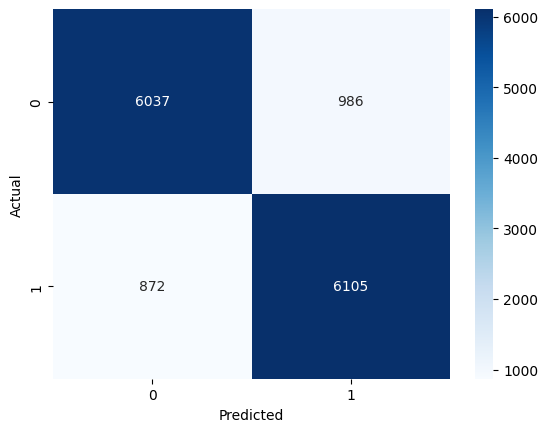

In [ ]:
conf_matrix=np.array([[6037,  986],
                      [ 872, 6105]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
person_home_ownership=float(input('enter person_home_ownership :'))
loan_int_rate=float(input('enter loan_int_rate :'))
loan_percent_income=float(input('enter loan_percent_income'))
previous_loan_defaults_on_file=float(input('enter previous_loan_defaults_on_file :'))

user_input=[[person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file]]
loan_status=model_2.predict(user_input)
print(f'The Predicted :{loan_status}')

enter person_home_ownership :3
enter loan_int_rate :16.02
enter loan_percent_income.49
enter previous_loan_defaults_on_file :0
The Predicted :[1]


# **CONCLUSION**

The analysis of the loan application dataset has provided valuable insights into the factors influencing loan approval decisions. Through data preprocessing, feature encoding, and oversampling techniques, the dataset was made suitable for machine learning models. By identifying and handling issues like class imbalance, outliers, and skewness, we ensured the data was ready for accurate predictions. After training multiple machine learning models, the Random Forest Classifier emerged as the most effective model, providing a high accuracy rate in predicting loan status. The confusion matrix further revealed that the model was proficient at identifying both approved and rejected loan applications. The analysis highlighted key features that influence loan approval, such as home ownership, loan interest rate, and previous loan defaults. This predictive model can help financial institutions reduce risks, improve decision-making efficiency, and ensure fairer loan approval processes. By automating the evaluation of loan applications, the model not only enhances operational efficiency but also promotes transparency and consistency in lending practices.








# **REFERENCES**

1. Kaggle
2. ChatGPT
3. Gemini